In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('INR=X.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-18,76.289803,76.550003,76.001503,76.550003,76.550003,0
1,2020-06-19,76.483101,76.635002,76.105499,76.400398,76.400398,0
2,2020-06-22,76.257301,76.453499,75.738503,76.252098,76.252098,0
3,2020-06-23,76.000000,76.119797,75.472000,75.789803,75.789803,0
4,2020-06-24,75.839996,75.839996,75.466003,75.607803,75.607803,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,73.833236,74.027973,73.581311,73.816653,73.816653,0.0
std,0.909076,0.888711,0.857812,0.903348,0.903348,0.0
min,72.380501,72.539101,72.265999,72.295601,72.295601,0.0
25%,73.129252,73.350998,72.926975,73.132199,73.132199,0.0
50%,73.675800,73.819901,73.390499,73.648751,73.648751,0.0
75%,74.548628,74.746153,74.266752,74.530302,74.530302,0.0
max,76.483101,76.635002,76.105499,76.550003,76.550003,0.0


In [5]:
data.shape

(262, 7)

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

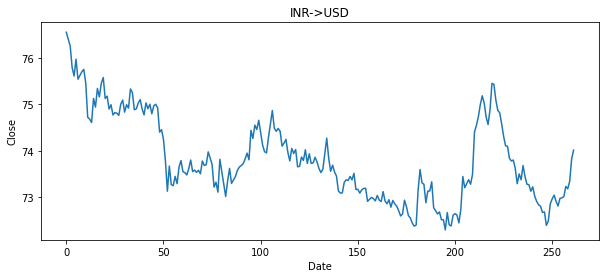

In [8]:
plt.figure(figsize=(10,4))
plt.title("INR->USD")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

<AxesSubplot:>

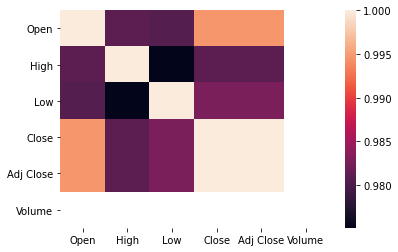

In [10]:
sns.heatmap(data.corr())

In [11]:
print(data.corr())

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.981036  0.980601  0.994620   0.994620     NaN
High       0.981036  1.000000  0.975095  0.981070   0.981070     NaN
Low        0.980601  0.975095  1.000000  0.982838   0.982838     NaN
Close      0.994620  0.981070  0.982838  1.000000   1.000000     NaN
Adj Close  0.994620  0.981070  0.982838  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


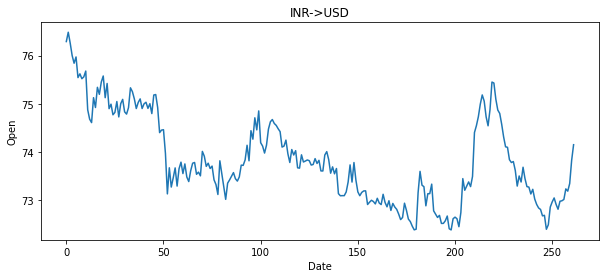

In [12]:
plt.figure(figsize=(10,4))
plt.title("INR->USD")
plt.xlabel("Date")
plt.ylabel("Open")
plt.plot(data["Open"])
plt.show()

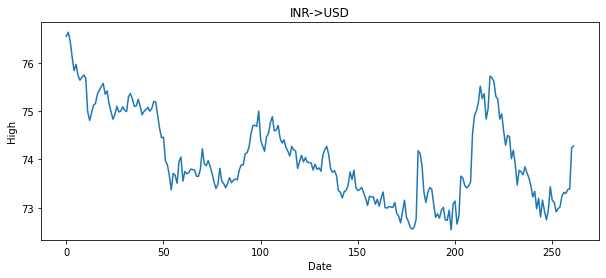

In [13]:
plt.figure(figsize=(10,4))
plt.title("INR->USD")
plt.xlabel("Date")
plt.ylabel("High")
plt.plot(data["High"])
plt.show()

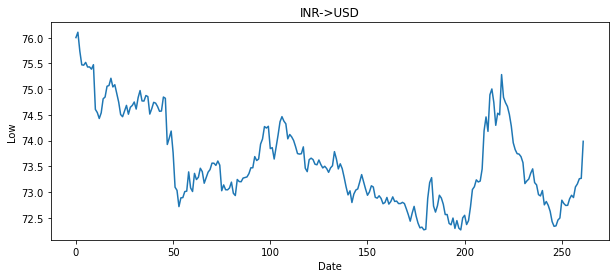

In [14]:
plt.figure(figsize=(10,4))
plt.title("INR->USD")
plt.xlabel("Date")
plt.ylabel("Low")
plt.plot(data["Low"])
plt.show()

In [15]:
X = data[["Open","High","Low"]]
Y = data["Close"]

In [16]:
X = X.to_numpy()
Y = Y.to_numpy()

In [17]:
Y = Y.reshape(-1,1)

In [18]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
#model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [20]:
#prediction
ypred = model.predict(xtest)

In [22]:
#prediction for next 5 days
res = pd.DataFrame(data={'Predicited rate':ypred.flatten()})
print(res.head())

   Predicited rate
0        72.444000
1        74.807297
2        72.553001
3        72.916298
4        73.513496


In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 squared error:",r2_score(ypred,ytest))

R2 squared error: 0.9870980711391282
